# environmental setup

In [1]:
# BASIC
import numpy as np
import xarray as xr
import pandas as pd

#xr.set_options(display_style="text") # make it look better when posted online. Comment to get nicer representation of xarrays
import os

# matplotlib
import matplotlib
#%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.tri as mtri
import matplotlib.dates as md
import matplotlib.patches as patches
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib import ticker
matplotlib.rcParams['figure.dpi'] = 300
matplotlib.rcParams['axes.linewidth'] = 1.5

## color
from matplotlib import cm
import cmocean
import seaborn as sns

## cartopy
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point


# scipy
from scipy import stats
from scipy import optimize
from scipy.interpolate import CloughTocher2DInterpolator, LinearNDInterpolator, NearestNDInterpolator
from scipy.stats import binned_statistic
import scipy.spatial.qhull as qhull


# metpy
import metpy
import metpy.calc as mpcalc


# etc
import subprocess
import time
import datetime
from datetime import timedelta
import calendar


# Dask
import dask # Distributed data libary
from dask import delayed
from dask import compute
from dask_jobqueue import SLURMCluster # Setting up distributed memories via slurm
from dask.utils import format_bytes
from distributed import Client, progress # Libaray to orchestrate distributed resources
from dask.distributed import Client
dask.config.config.get('distributed').get('dashboard').update({'link':'{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'})

from pathlib import Path
from getpass import getuser # Libaray to copy things
from pathlib import Path # Object oriented libary to deal with paths
from tempfile import NamedTemporaryFile, TemporaryDirectory # Creating temporary Files/Dirs
import warnings
warnings.filterwarnings(action='ignore')



In [2]:
WORK_DIR = '~/python/land_atm_coupling/land-atm_coupling_publication/'

# data

In [3]:
dpath = f'{WORK_DIR}/data/CMIP6/'
land_frac = xr.open_mfdataset(f'{dpath}/bc_land_frac_2x2.nc')
land_frac

<xarray.Dataset>
Dimensions:        (lon: 180, lat: 90)
Coordinates:
  * lon            (lon) float64 -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
  * lat            (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
Data variables: (12/21)
    notsea         (lat, lon) float64 dask.array<chunksize=(90, 180), meta=np.ndarray>
    fract_glac     (lat, lon) float64 dask.array<chunksize=(90, 180), meta=np.ndarray>
    sea            (lat, lon) float64 dask.array<chunksize=(90, 180), meta=np.ndarray>
    fract_lake     (lat, lon) float64 dask.array<chunksize=(90, 180), meta=np.ndarray>
    fract_land     (lat, lon) float64 dask.array<chunksize=(90, 180), meta=np.ndarray>
    fract_veg      (lat, lon) float64 dask.array<chunksize=(90, 180), meta=np.ndarray>
    ...             ...
    fract_pft09    (lat, lon) float64 dask.array<chunksize=(90, 180), meta=np.ndarray>
    fract_pft10    (lat, lon) float64 dask.array<chunksize=(90, 180), meta=np.ndarray>
    fract_pft11    (lat, lon) float64 dask.array<chunksize=(90, 180), meta=np.ndarray>
    land           (lat, lon) float64 dask.array<chunksize=(90, 180), meta=np.ndarray>
    lake           (lat, lon) float64 dask.array<chunksize=(90, 180), meta=np.ndarray>
    glac           (lat, lon) float64 dask.array<chunksize=(90, 180), meta=np.ndarray>
Attributes: (12/44)
    CDI:                      Climate Data Interface version 2.0.6 (https://m...
    Conventions:              CF-1.6
    institution:              Max Planck Institute for Meteorology
    title:                    ICON grid description
    revision:                 Unknown
    date:                     20190730 at 185620
    ...                       ...
    subcentre:                1
    ICON_grid_file_uri:       http://icon-downloads.mpimet.mpg.de/grids/publi...
    comment:                  setup for an experiment with ocean model: grid ...
    history:                  Fri Oct 21 15:40:01 2022: cdo remap,grid_2x2.tx...
    NCO:                      4.6.7
    CDO:                      Climate Data Operators version 2.0.6 (https://m...

## ICON

In [4]:
dpath = f'{WORK_DIR}/data/dpp0066/'

dataICON1  = xr.open_mfdataset(f'{dpath}/dpp0066_2020_full_daily_pr_2x2.nc')
dataICON2  = xr.open_mfdataset(f'{dpath}/dpp0066_2020_full_daily_hfls_2x2.nc')
dataICON3  = xr.open_mfdataset(f'{dpath}/dpp0066_2020_full_daily_hfss_2x2.nc')
dataICON4  = xr.open_mfdataset(f'{dpath}/dpp0066_2020_full_daily_run_2x2.nc')
dataICON5  = xr.open_mfdataset(f'{dpath}/dpp0066_2020_full_daily_rootsm_2x2.nc')
dataICON51 = xr.open_mfdataset(f'{dpath}/dpp0066_2020_full_daily_rsds_2x2.nc')
dataICON52 = xr.open_mfdataset(f'{dpath}/dpp0066_2020_full_daily_rsus_2x2.nc')
dataICON53 = xr.open_mfdataset(f'{dpath}/dpp0066_2020_full_daily_rlds_2x2.nc')
dataICON54 = xr.open_mfdataset(f'{dpath}/dpp0066_2020_full_daily_rlus_2x2.nc')
dataICON6  = xr.open_mfdataset(f'{dpath}/dpp0066_2020_full_daily_drain_2x2.nc')
dataICON7  = xr.open_mfdataset(f'{dpath}/dpp0066_2020_full_daily_smi_2x2.nc')
dataICON8  = xr.open_mfdataset(f'{dpath}/dpp0066_2020_full_daily_w_soil_sl0_2x2.nc')
dataICON_sl1 = xr.open_mfdataset(f'{dpath}/dpp0066_2020_full_daily_w_soil_sl1_2x2.nc')
dataICON_sl2 = xr.open_mfdataset(f'{dpath}/dpp0066_2020_full_daily_w_soil_sl2_2x2.nc')


dataICON = xr.merge([dataICON1, dataICON2, dataICON3, dataICON4, dataICON5, 
                     dataICON51, dataICON52, dataICON53, dataICON54, 
                     dataICON6, dataICON7, dataICON8])

dataICON1= dataICON
dataICON = dataICON.sel(time=slice('2020-06-01','2020-08-31'))
dataICON

<xarray.Dataset>
Dimensions:              (time: 92, lon: 180, lat: 90)
Coordinates:
  * time                 (time) datetime64[ns] 2020-06-01 ... 2020-08-31
  * lon                  (lon) float64 -179.0 -177.0 -175.0 ... 177.0 179.0
  * lat                  (lat) float64 -89.0 -87.0 -85.0 ... 85.0 87.0 89.0
Data variables: (12/13)
    pr                   (time, lat, lon) float32 dask.array<chunksize=(92, 90, 180), meta=np.ndarray>
    hfls                 (time, lat, lon) float32 dask.array<chunksize=(92, 90, 180), meta=np.ndarray>
    hfss                 (time, lat, lon) float32 dask.array<chunksize=(92, 90, 180), meta=np.ndarray>
    run                  (time, lat, lon) float32 dask.array<chunksize=(92, 90, 180), meta=np.ndarray>
    rootsm               (time, lat, lon) float32 dask.array<chunksize=(92, 90, 180), meta=np.ndarray>
    rsds                 (time, lat, lon) float32 dask.array<chunksize=(92, 90, 180), meta=np.ndarray>
    ...                   ...
    rlds                 (time, lat, lon) float32 dask.array<chunksize=(92, 90, 180), meta=np.ndarray>
    rlus                 (time, lat, lon) float32 dask.array<chunksize=(92, 90, 180), meta=np.ndarray>
    drain                (time, lat, lon) float32 dask.array<chunksize=(92, 90, 180), meta=np.ndarray>
    smi                  (time, lat, lon) float64 dask.array<chunksize=(92, 90, 180), meta=np.ndarray>
    hydro_w_soil_sl_box  (time, lat, lon) float32 dask.array<chunksize=(92, 90, 180), meta=np.ndarray>
    hydro_w_ice_sl_box   (time, lat, lon) float32 dask.array<chunksize=(92, 90, 180), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.3 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Nov 28 14:33:25 2022: cdo remap,/work/mh0731/m300793/da...
    CDO:          Climate Data Operators version 2.0.3 (https://mpimet.mpg.de...

In [5]:
dpath = f'{WORK_DIR}/data/dpp0066/'
dataICON_init = xr.open_mfdataset(f'{dpath}/bc_land_soil_2x2.nc')

## CMIP

In [6]:
dpath     = f'{WORK_DIR}/data/CMIP6/'

dataCMIP1  = xr.open_mfdataset(dpath+'/ICON-ESM-LR_full_daily_pr_2x2.nc')
dataCMIP2  = xr.open_mfdataset(dpath+'/ICON-ESM-LR_full_daily_hfls_2x2.nc')
dataCMIP3  = xr.open_mfdataset(dpath+'/ICON-ESM-LR_full_daily_hfss_2x2.nc')
dataCMIP4  = xr.open_mfdataset(dpath+'/ICON-ESM-LR_full_daily_runoff_2x2.nc')
dataCMIP5  = xr.open_mfdataset(dpath+'/ICON-ESM-LR_full_daily_rzwc_2x2.nc')
dataCMIP51 = xr.open_mfdataset(dpath+'/ICON-ESM-LR_full_daily_rsds_2x2.nc')
dataCMIP52 = xr.open_mfdataset(dpath+'/ICON-ESM-LR_full_daily_rsus_2x2.nc')
dataCMIP53 = xr.open_mfdataset(dpath+'/ICON-ESM-LR_full_daily_rlds_2x2.nc')
dataCMIP54 = xr.open_mfdataset(dpath+'/ICON-ESM-LR_full_daily_rlus_2x2.nc')
dataCMIP6  = xr.open_mfdataset(dpath+'/ICON-ESM-LR_full_daily_drain_2x2.nc')
dataCMIP7  = xr.open_mfdataset(dpath+'/ICON-ESM-LR_full_daily_smi_2x2.nc')
dataCMIP8  = xr.open_mfdataset(dpath+'/ICON-ESM-LR_full_daily_w_soil_sl_2x2.nc').isel(soil_depth_water=0)
dataCMIP_sl1 = xr.open_mfdataset(dpath+'/ICON-ESM-LR_full_daily_w_soil_sl_2x2.nc').isel(soil_depth_water=1)
dataCMIP_sl2 = xr.open_mfdataset(dpath+'/ICON-ESM-LR_full_daily_w_soil_sl_2x2.nc').isel(soil_depth_water=2)

dataCMIP = xr.merge([dataCMIP1, dataCMIP2, dataCMIP3, dataCMIP4, dataCMIP5, 
                     dataCMIP51, dataCMIP52, dataCMIP53, dataCMIP54, 
                     dataCMIP6, dataCMIP7, dataCMIP8])
dataCMIP1 = dataCMIP
dataCMIP = dataCMIP.sel(time=dataCMIP.time.dt.month.isin([6, 7, 8]))
dataCMIP

<xarray.Dataset>
Dimensions:              (time: 5520, lon: 180, lat: 90)
Coordinates:
  * time                 (time) datetime64[ns] 2000-06-01 ... 2059-08-31
  * lon                  (lon) float64 -179.0 -177.0 -175.0 ... 177.0 179.0
  * lat                  (lat) float64 -89.0 -87.0 -85.0 ... 85.0 87.0 89.0
    soil_depth_water     float64 0.0325
Data variables: (12/13)
    pr                   (time, lat, lon) float32 dask.array<chunksize=(5520, 90, 180), meta=np.ndarray>
    hfls                 (time, lat, lon) float32 dask.array<chunksize=(5520, 90, 180), meta=np.ndarray>
    hfss                 (time, lat, lon) float32 dask.array<chunksize=(5520, 90, 180), meta=np.ndarray>
    mrro                 (time, lat, lon) float32 dask.array<chunksize=(5520, 90, 180), meta=np.ndarray>
    rzwc                 (time, lat, lon) float32 dask.array<chunksize=(5520, 90, 180), meta=np.ndarray>
    rsds                 (time, lat, lon) float32 dask.array<chunksize=(5520, 90, 180), meta=np.ndarray>
    ...                   ...
    rlds                 (time, lat, lon) float32 dask.array<chunksize=(5520, 90, 180), meta=np.ndarray>
    rlus                 (time, lat, lon) float32 dask.array<chunksize=(5520, 90, 180), meta=np.ndarray>
    hydro_drainage_box   (time, lat, lon) float32 dask.array<chunksize=(5520, 90, 180), meta=np.ndarray>
    smi                  (time, lat, lon) float64 dask.array<chunksize=(5520, 90, 180), meta=np.ndarray>
    hydro_w_soil_sl_box  (time, lat, lon) float32 dask.array<chunksize=(5520, 90, 180), meta=np.ndarray>
    hydro_w_ice_sl_box   (time, lat, lon) float32 dask.array<chunksize=(5520, 90, 180), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.6 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Oct 21 15:15:30 2022: cdo remap,grid_2x2.txt,weight_2x2...
    CDO:          Climate Data Operators version 2.0.6 (https://mpimet.mpg.de...

In [7]:
dpath = f'{WORK_DIR}/data/CMIP6/'
dataCMIP_init = xr.open_mfdataset(dpath+'/bc_land_soil_2x2.nc')

# processing

In [8]:
icon_pr = dataICON['pr'].mean('time')
cmip_pr = dataCMIP['pr'].mean('time') * 86400.

In [9]:
icon_smi = dataICON['smi']
icon_y1  = dataICON['hfls']
icon_y2  = dataICON['hfss']

icon_corr_lh_pr = xr.corr(dataICON['pr'], icon_y1, dim='time')

In [10]:
cmip_smi = dataCMIP['smi']
cmip_y1  = dataCMIP['hfls']
cmip_y2  = dataCMIP['hfss']

cmip_corr_lh_pr = xr.corr(dataCMIP['pr']*86400., cmip_y1, dim='time')

In [11]:
icon_corr_lh_sl0  = xr.corr(dataICON['hydro_w_soil_sl_box'], icon_y1, dim='time')
icon_corr_pr_sl0  = xr.corr(dataICON['hydro_w_soil_sl_box'], dataICON['pr'], dim='time')
icon_corr_lh_sl1  = xr.corr(dataICON_sl1['hydro_w_soil_sl_box'], icon_y1, dim='time')
icon_corr_pr_sl1  = xr.corr(dataICON_sl1['hydro_w_soil_sl_box'], dataICON['pr'], dim='time')
icon_corr_lh_sl2  = xr.corr(dataICON_sl2['hydro_w_soil_sl_box'], icon_y1, dim='time')
icon_corr_pr_sl2  = xr.corr(dataICON_sl2['hydro_w_soil_sl_box'], dataICON['pr'], dim='time')

In [12]:
CMIP_lon, CMIP_lat = np.meshgrid(dataICON['lon'], dataICON['lat'])

### internal variability for FLUXNET

In [13]:
temp_pr_sl0 = []
temp_lh_sl0 = []
temp_lh_pr  = []
temp_pr_sl1 = []
temp_lh_sl1 = []
temp_pr_sl2 = []
temp_lh_sl2 = []

temp_smi = []
for tt in np.arange(2000,2060):
    pr  = dataCMIP['pr'].sel(time=str(tt))*86400.
    sl0 = dataCMIP['hydro_w_soil_sl_box'].sel(time=str(tt))
    sl1 = dataCMIP_sl1['hydro_w_soil_sl_box'].sel(time=str(tt))
    sl2 = dataCMIP_sl2['hydro_w_soil_sl_box'].sel(time=str(tt))
    lh  = cmip_y1.sel(time=str(tt))

    
    corr_temp = xr.corr(pr, sl0, dim='time')
    temp_pr_sl0.append(corr_temp)

    corr_temp = xr.corr(lh, sl0, dim='time')
    temp_lh_sl0.append(corr_temp)

    corr_temp = xr.corr(lh, pr, dim='time')
    temp_lh_pr.append(corr_temp)

    corr_temp = xr.corr(pr, sl1, dim='time')
    temp_pr_sl1.append(corr_temp)

    corr_temp = xr.corr(lh, sl1, dim='time')
    temp_lh_sl1.append(corr_temp)
    
    corr_temp = xr.corr(pr, sl2, dim='time')
    temp_pr_sl2.append(corr_temp)

    corr_temp = xr.corr(lh, sl2, dim='time')
    temp_lh_sl2.append(corr_temp)

In [14]:
internal_pr_sl0 = xr.concat(temp_pr_sl0,dim='time')
internal_pr_sl0['time'] =  pd.date_range('2000-06-01', periods=60, freq='1Y')

internal_lh_sl0 = xr.concat(temp_lh_sl0,dim='time')
internal_lh_sl0['time'] =  pd.date_range('2000-06-01', periods=60, freq='1Y')

internal_lh_pr  = xr.concat(temp_lh_pr,dim='time')
internal_lh_pr['time']  =  pd.date_range('2000-06-01', periods=60, freq='1Y')

internal_pr_sl1 = xr.concat(temp_pr_sl1,dim='time')
internal_pr_sl1['time'] =  pd.date_range('2000-06-01', periods=60, freq='1Y')

internal_lh_sl1 = xr.concat(temp_lh_sl1,dim='time')
internal_lh_sl1['time'] =  pd.date_range('2000-06-01', periods=60, freq='1Y')

internal_pr_sl2 = xr.concat(temp_pr_sl2,dim='time')
internal_pr_sl2['time'] =  pd.date_range('2000-06-01', periods=60, freq='1Y')

internal_lh_sl2 = xr.concat(temp_lh_sl2,dim='time')
internal_lh_sl2['time'] =  pd.date_range('2000-06-01', periods=60, freq='1Y')

# Fluxnet

In [15]:
dpath    = f'{WORK_DIR}/data/Fluxnet2015/'
dataFLUX = xr.open_mfdataset(dpath+'FLUXNET_yearly_corr_DD.nc')
dataFLUX

<xarray.Dataset>
Dimensions:      (time: 24, SITE: 206)
Coordinates:
  * time         (time) datetime64[ns] 1991-12-31 1992-12-31 ... 2014-12-31
  * SITE         (SITE) object 'AR-SLu' 'AR-Vir' 'AT-Neu' ... 'US-Wkg' 'ZM-Mon'
Data variables:
    corr_tas     (time, SITE) float64 dask.array<chunksize=(24, 206), meta=np.ndarray>
    corr_lh_pr   (time, SITE) float64 dask.array<chunksize=(24, 206), meta=np.ndarray>
    corr_swc_pr  (time, SITE) float64 dask.array<chunksize=(24, 206), meta=np.ndarray>
    corr_swc_lh  (time, SITE) float64 dask.array<chunksize=(24, 206), meta=np.ndarray>
    longitude    (SITE) float64 dask.array<chunksize=(206,), meta=np.ndarray>
    latitude     (SITE) float64 dask.array<chunksize=(206,), meta=np.ndarray>
    height       (SITE) float64 dask.array<chunksize=(206,), meta=np.ndarray>

In [16]:
flux_sm_pr = dataFLUX['corr_swc_pr'].values.transpose()
flux_sm_lh = dataFLUX['corr_swc_lh'].values.transpose()
flux_lh_pr = dataFLUX['corr_lh_pr'].values.transpose()

In [17]:
# Define desired regions
# box = [-130, 40, 25, 70]
box = [-180, 180, -90, 90]

valid_site_list, valid_height_list = [], []
valid_lon_list, valid_lat_list = [], []

# get meta data
lon, lat, site_name, height = dataFLUX['longitude'].values, dataFLUX['latitude'].values, dataFLUX['SITE'].values, dataFLUX['height'].values
# data = dataFLUX['corr_swc_pr'].values

# Select data within desired regions 
for ii in np.arange(len(lon[:])):
    if (lon[ii]>box[0]) & (lon[ii]<=box[1]) & (lat[ii]>box[2]) & (lat[ii]<=box[3]):
        
        # if np.sum(~np.isnan(data[:,ii]), axis=0) >= 10:
            # ax.text(lon[ii], lat[ii], site_name[ii], size=6, transform=ccrs.PlateCarree())
            # ax.scatter(lon[ii], lat[ii], marker='^', c='r', s=4, transform=ccrs.PlateCarree())

        valid_site_list.append(site_name[ii])
        valid_lat_list.append(lat[ii])
        valid_lon_list.append(lon[ii])
        valid_height_list.append(height[ii])

### Get interpolated simulations data

In [20]:
dpath = f'{WORK_DIR}/data/dpp0066/'

interpolated_icon_sl0  = xr.open_mfdataset(f'{dpath}/interpolated_corr_DD_sl0.nc')
interpolated_icon_sl1  = xr.open_mfdataset(f'{dpath}/interpolated_corr_DD_sl1.nc')
interpolated_icon_sl2  = xr.open_mfdataset(f'{dpath}/interpolated_corr_DD_sl2.nc')

icon_sm_pr = interpolated_icon_sl0['sm_pr'].values
icon_sm_lh = interpolated_icon_sl0['sm_lh'].values
icon_lh_pr = interpolated_icon_sl0['lh_pr'].values
icon_sm_pr_sl1 = interpolated_icon_sl1['sm_pr'].values
icon_sm_lh_sl1 = interpolated_icon_sl1['sm_lh'].values
icon_sm_pr_sl2 = interpolated_icon_sl2['sm_pr'].values
icon_sm_lh_sl2 = interpolated_icon_sl2['sm_lh'].values

In [21]:
new_site_list = interpolated_icon_sl0['SITE'].values
new_height_list = interpolated_icon_sl0['height'].values

In [22]:
dpath = f'{WORK_DIR}/data/CMIP6/'

interpolated_cmip_sl0  = xr.open_mfdataset(f'{dpath}/interpolated_corr_DD_sl0.nc')
interpolated_cmip_sl1  = xr.open_mfdataset(f'{dpath}/interpolated_corr_DD_sl1.nc')
interpolated_cmip_sl2  = xr.open_mfdataset(f'{dpath}/interpolated_corr_DD_sl2.nc')

cmip_sm_pr = interpolated_cmip_sl0['sm_pr'].values
cmip_sm_lh = interpolated_cmip_sl0['sm_lh'].values
cmip_lh_pr = interpolated_cmip_sl0['lh_pr'].values
cmip_sm_pr_sl1 = interpolated_cmip_sl1['sm_pr'].values
cmip_sm_lh_sl1 = interpolated_cmip_sl1['sm_lh'].values
cmip_sm_pr_sl2 = interpolated_cmip_sl2['sm_pr'].values
cmip_sm_lh_sl2 = interpolated_cmip_sl2['sm_lh'].values

### Swap data to match depth

In [23]:
# Set soil layer depth of the models
dz = np.array([(0.065-0.0), (0.319-0.065), (1.232-0.319), (4.134-1.232), (9.834-4.134)])
z_soil = dz/2 + [0., 0.065, 0.319, 1.232, 4.134]

In [24]:
flux_sm_pr = np.zeros((len(new_site_list), len(dataFLUX['time'])))
flux_sm_lh = np.zeros((len(new_site_list), len(dataFLUX['time'])))
flux_lh_pr = np.zeros((len(new_site_list), len(dataFLUX['time'])))

for ii in np.arange(len(new_site_list)):
    # Check which layer OBS locates among model layers
    diff_z = np.abs(z_soil - np.abs(new_height_list[ii]))
    idx = np.argmin(diff_z)
    
    if idx == 1: # Second layer
        icon_sm_pr[ii,:] = icon_sm_pr_sl1[ii,:]
        icon_sm_lh[ii,:] = icon_sm_lh_sl1[ii,:]
        cmip_sm_pr[ii,:] = cmip_sm_pr_sl1[ii,:]
        cmip_sm_lh[ii,:] = cmip_sm_lh_sl1[ii,:]
        flux_sm_pr[ii,:] = dataFLUX['corr_swc_pr'].sel(SITE=new_site_list[ii]).values
        flux_sm_lh[ii,:] = dataFLUX['corr_swc_lh'].sel(SITE=new_site_list[ii]).values
        flux_lh_pr[ii,:] = dataFLUX['corr_lh_pr'] .sel(SITE=new_site_list[ii]).values
    elif idx == 2: # Third layer
        icon_sm_pr[ii,:] = icon_sm_pr_sl1[ii,:]
        icon_sm_lh[ii,:] = icon_sm_lh_sl1[ii,:]
        cmip_sm_pr[ii,:] = cmip_sm_pr_sl1[ii,:]
        cmip_sm_lh[ii,:] = cmip_sm_lh_sl1[ii,:]
        flux_sm_pr[ii,:] = dataFLUX['corr_swc_pr'].sel(SITE=new_site_list[ii]).values
        flux_sm_lh[ii,:] = dataFLUX['corr_swc_lh'].sel(SITE=new_site_list[ii]).values
        flux_lh_pr[ii,:] = dataFLUX['corr_lh_pr'] .sel(SITE=new_site_list[ii]).values
    else:
        if np.isnan(new_height_list[ii]): # No SM data
            icon_sm_pr[ii,:], icon_sm_lh[ii,:], icon_sm_lh[ii,:] = np.NaN, np.NaN, np.NaN
            cmip_sm_pr[ii,:], cmip_sm_lh[ii,:], cmip_sm_lh[ii,:] = np.NaN, np.NaN, np.NaN
            flux_sm_pr[ii,:], flux_sm_lh[ii,:], flux_lh_pr[ii,:] = np.NaN, np.NaN, np.NaN
        else: # First layer
            flux_sm_pr[ii,:] = dataFLUX['corr_swc_pr'].sel(SITE=new_site_list[ii]).values
            flux_sm_lh[ii,:] = dataFLUX['corr_swc_lh'].sel(SITE=new_site_list[ii]).values
            flux_lh_pr[ii,:] = dataFLUX['corr_lh_pr'] .sel(SITE=new_site_list[ii]).values

### Compute median

In [25]:
flux_median_sm_pr = np.nanmedian(flux_sm_pr, axis=1)
flux_median_sm_lh = np.nanmedian(flux_sm_lh, axis=1)
flux_median_lh_pr = np.nanmedian(flux_lh_pr, axis=1)

In [26]:
cmip_median_sm_pr = np.nanmedian(cmip_sm_pr, axis=1)
cmip_median_sm_lh = np.nanmedian(cmip_sm_lh, axis=1)
cmip_median_lh_pr = np.nanmedian(cmip_lh_pr, axis=1)

### Remove NaN and sort data

In [27]:
nan_idx = np.isnan(flux_median_sm_pr)
cmip_median_sm_pr = cmip_median_sm_pr[~nan_idx]
cmip_sm_pr        = cmip_sm_pr[~nan_idx,:]
icon_sm_pr        = icon_sm_pr[~nan_idx,:]
flux_median_sm_pr = flux_median_sm_pr[~nan_idx]
flux_sm_pr        = flux_sm_pr[~nan_idx]
site_list_sm_pr   = new_site_list[~nan_idx]
sort_idx_sm_pr = sort_idx_sm_pr = [x for _, x in sorted(zip(flux_median_sm_pr, np.arange(len(flux_median_sm_pr))))]

nan_idx = np.isnan(flux_median_sm_lh)
cmip_median_sm_lh = cmip_median_sm_lh[~nan_idx]
cmip_sm_lh        = cmip_sm_lh[~nan_idx,:]
icon_sm_lh        = icon_sm_lh[~nan_idx,:]
flux_median_sm_lh = flux_median_sm_lh[~nan_idx]
flux_sm_lh        = flux_sm_lh[~nan_idx]
site_list_sm_lh   = new_site_list[~nan_idx]
sort_idx_sm_lh = sort_idx_sm_lh = [x for _, x in sorted(zip(flux_median_sm_lh, np.arange(len(flux_median_sm_lh))))]

nan_idx = np.isnan(flux_median_lh_pr)
cmip_median_lh_pr = cmip_median_lh_pr[~nan_idx]
cmip_lh_pr        = cmip_lh_pr[~nan_idx,:]
icon_lh_pr        = icon_lh_pr[~nan_idx,:]
flux_median_lh_pr = flux_median_lh_pr[~nan_idx]
flux_lh_pr        = flux_lh_pr[~nan_idx]
site_list_lh_pr   = new_site_list[~nan_idx]
sort_idx_lh_pr = sort_idx_lh_pr = [x for _, x in sorted(zip(flux_median_lh_pr, np.arange(len(flux_median_lh_pr))))]

# Plot

In [30]:
# define CONSTANT
DBOX = 0.12 # distance between boxes
wbox = 0.4 # box width
box1_color = 'black'
box2_color = 'gray'
JITTER = 0.02

# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

# Colors taken from Dark2 palette in RColorBrewer R library
# COLOR_SCALE = ["#1B9E77", "#D95F02", "#7570B3"]
COLOR_SCALE = ["#809bce", "#d4afb9", "#eac4d5", "#7570B3"]

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = [0, 1, 2]

# Horizontal lines
HLINES = [40, 50, 60]

def add_violin_plot(ax, plot_data, positions):
    violins = ax.violinplot(
        plot_data, positions=[positions], bw_method="silverman",
        showmeans=False, showmedians=False, showextrema=False,)

    # Customize violins (remove fill, customize line, etc.)
    for pc in violins["bodies"]:
        pc.set_facecolor("none")
        # pc.set_edgecolor('k')
        pc.set_edgecolor(BLACK)
        pc.set_linewidth(1.4)
        pc.set_alpha(1)
    

def add_box_plot(ax, plot_data, positions, color_index=GREY_DARK):
    medianprops = dict(linewidth=1, color=color_index, solid_capstyle="butt")
    boxprops    = dict(linewidth=0.5, color=color_index)

    ax.boxplot(plot_data, positions=[positions],
        showfliers=False, # Do not show the outliers beyond the caps.
        showcaps=False,   # Do not show the caps
        medianprops=medianprops, whiskerprops=boxprops, boxprops=boxprops)

def add_scatter_plot(ax, plot_data, positions, jj, color_index=0, label=None):
    # Create jittered version of "x" (which is only 0, 1, and 2)
    # More about this in the bonus track!
    # x_data = [np.array([i] * len(d)) for i, d in enumerate([plot_data])]
    # x_jittered = [x + stats.t(df=6, scale=JITTER).rvs(len(x)) for x in x_data]
    x_jittered = positions + stats.t(df=12, scale=JITTER).rvs(len(plot_data))

    # Add jittered dots ----------------------------------------------
    for x, y in zip(x_jittered, plot_data):
        # ax.scatter(x, y, s = 10, color=np.array(COLOR_SCALE)[color_index], alpha=0.6, edgecolors='gray')
        ax.scatter(x, y, s = 5, color=color_index, alpha=0.2, edgecolors='gray', linewidth=0.5)
        
    if jj == 1:
        ax.scatter(-10, -10, s=5, color=color_index, alpha=0.2, edgecolors='gray', label=label, linewidth=0.5)

def compare_difference(corrFLUX, corrCMIP, corrICON):
    flux_median = np.nanmedian(corrFLUX)
    cmip_median = np.nanmedian(corrCMIP)
    
    cmip_diff = np.abs( cmip_median - flux_median )
    icon_diff = np.abs( corrICON    - flux_median )
    
    if cmip_diff >= icon_diff:
        is_icon_close = True
    else:
        is_icon_close = False
        
    return is_icon_close

def plot_internal_variability(ax, corrFLUX, corrICON, corrCMIP, site_list, sort_idx,
                              is_violin=False, is_box=True, is_scatter=True):

    jj, kk, ll = 0, 0, 0
    site_label, is_icon_close = [], []
    # for ii in sort_idx:
    for xx in np.arange(len(site_list)):

        jj += 1
        ii = jj-1
        
        # FLUXNET2015
        plot_data = corrFLUX[ii,:]
        plot_data = plot_data[~np.isnan(plot_data)]

        if is_violin:
            add_violin_plot(ax, plot_data, positions=jj-DBOX)
        if is_box:
            add_box_plot(ax, plot_data, positions=jj-DBOX)
        if is_scatter:
            add_scatter_plot(ax, plot_data, positions=jj-DBOX, jj=jj, color_index='gray', label='Fluxnet2015')
            
        # CMIP6-LR
        plot_data = corrCMIP[ii,:]

        if is_violin:
            add_violin_plot(ax, plot_data, positions=jj+DBOX)
        if is_box:
            add_box_plot(ax, plot_data, positions=jj+DBOX, color_index='orangered')
        if is_scatter:
            add_scatter_plot(ax, plot_data, positions=jj+DBOX, jj=jj, color_index=plt.cm.RdBu([0.21]), label='LR')
            
        # ICON-SRM
        plot_data = corrICON[ii]
        ax.scatter(jj, plot_data, s=25, color=plt.cm.RdBu([0.85]), alpha=0.8, edgecolors='k')
        
        if compare_difference(corrFLUX[ii,:], corrCMIP[ii,:], corrICON[ii]):
            ax.get_xticklabels()[ii].set_color("blue")
            kk += 1
        else:
            ax.get_xticklabels()[ii].set_color("red")
            ll += 1
        site_label.append(site_list[ii])
        

    ax.scatter(-10, -10, s=25, color=plt.cm.RdBu([0.85]), alpha=0.8, edgecolors='k', label='SRM')
        
    ax.set_xticks(np.arange(1,jj+1))
    ax.set_xticklabels(site_label, rotation=45, fontsize=1, ha='right')

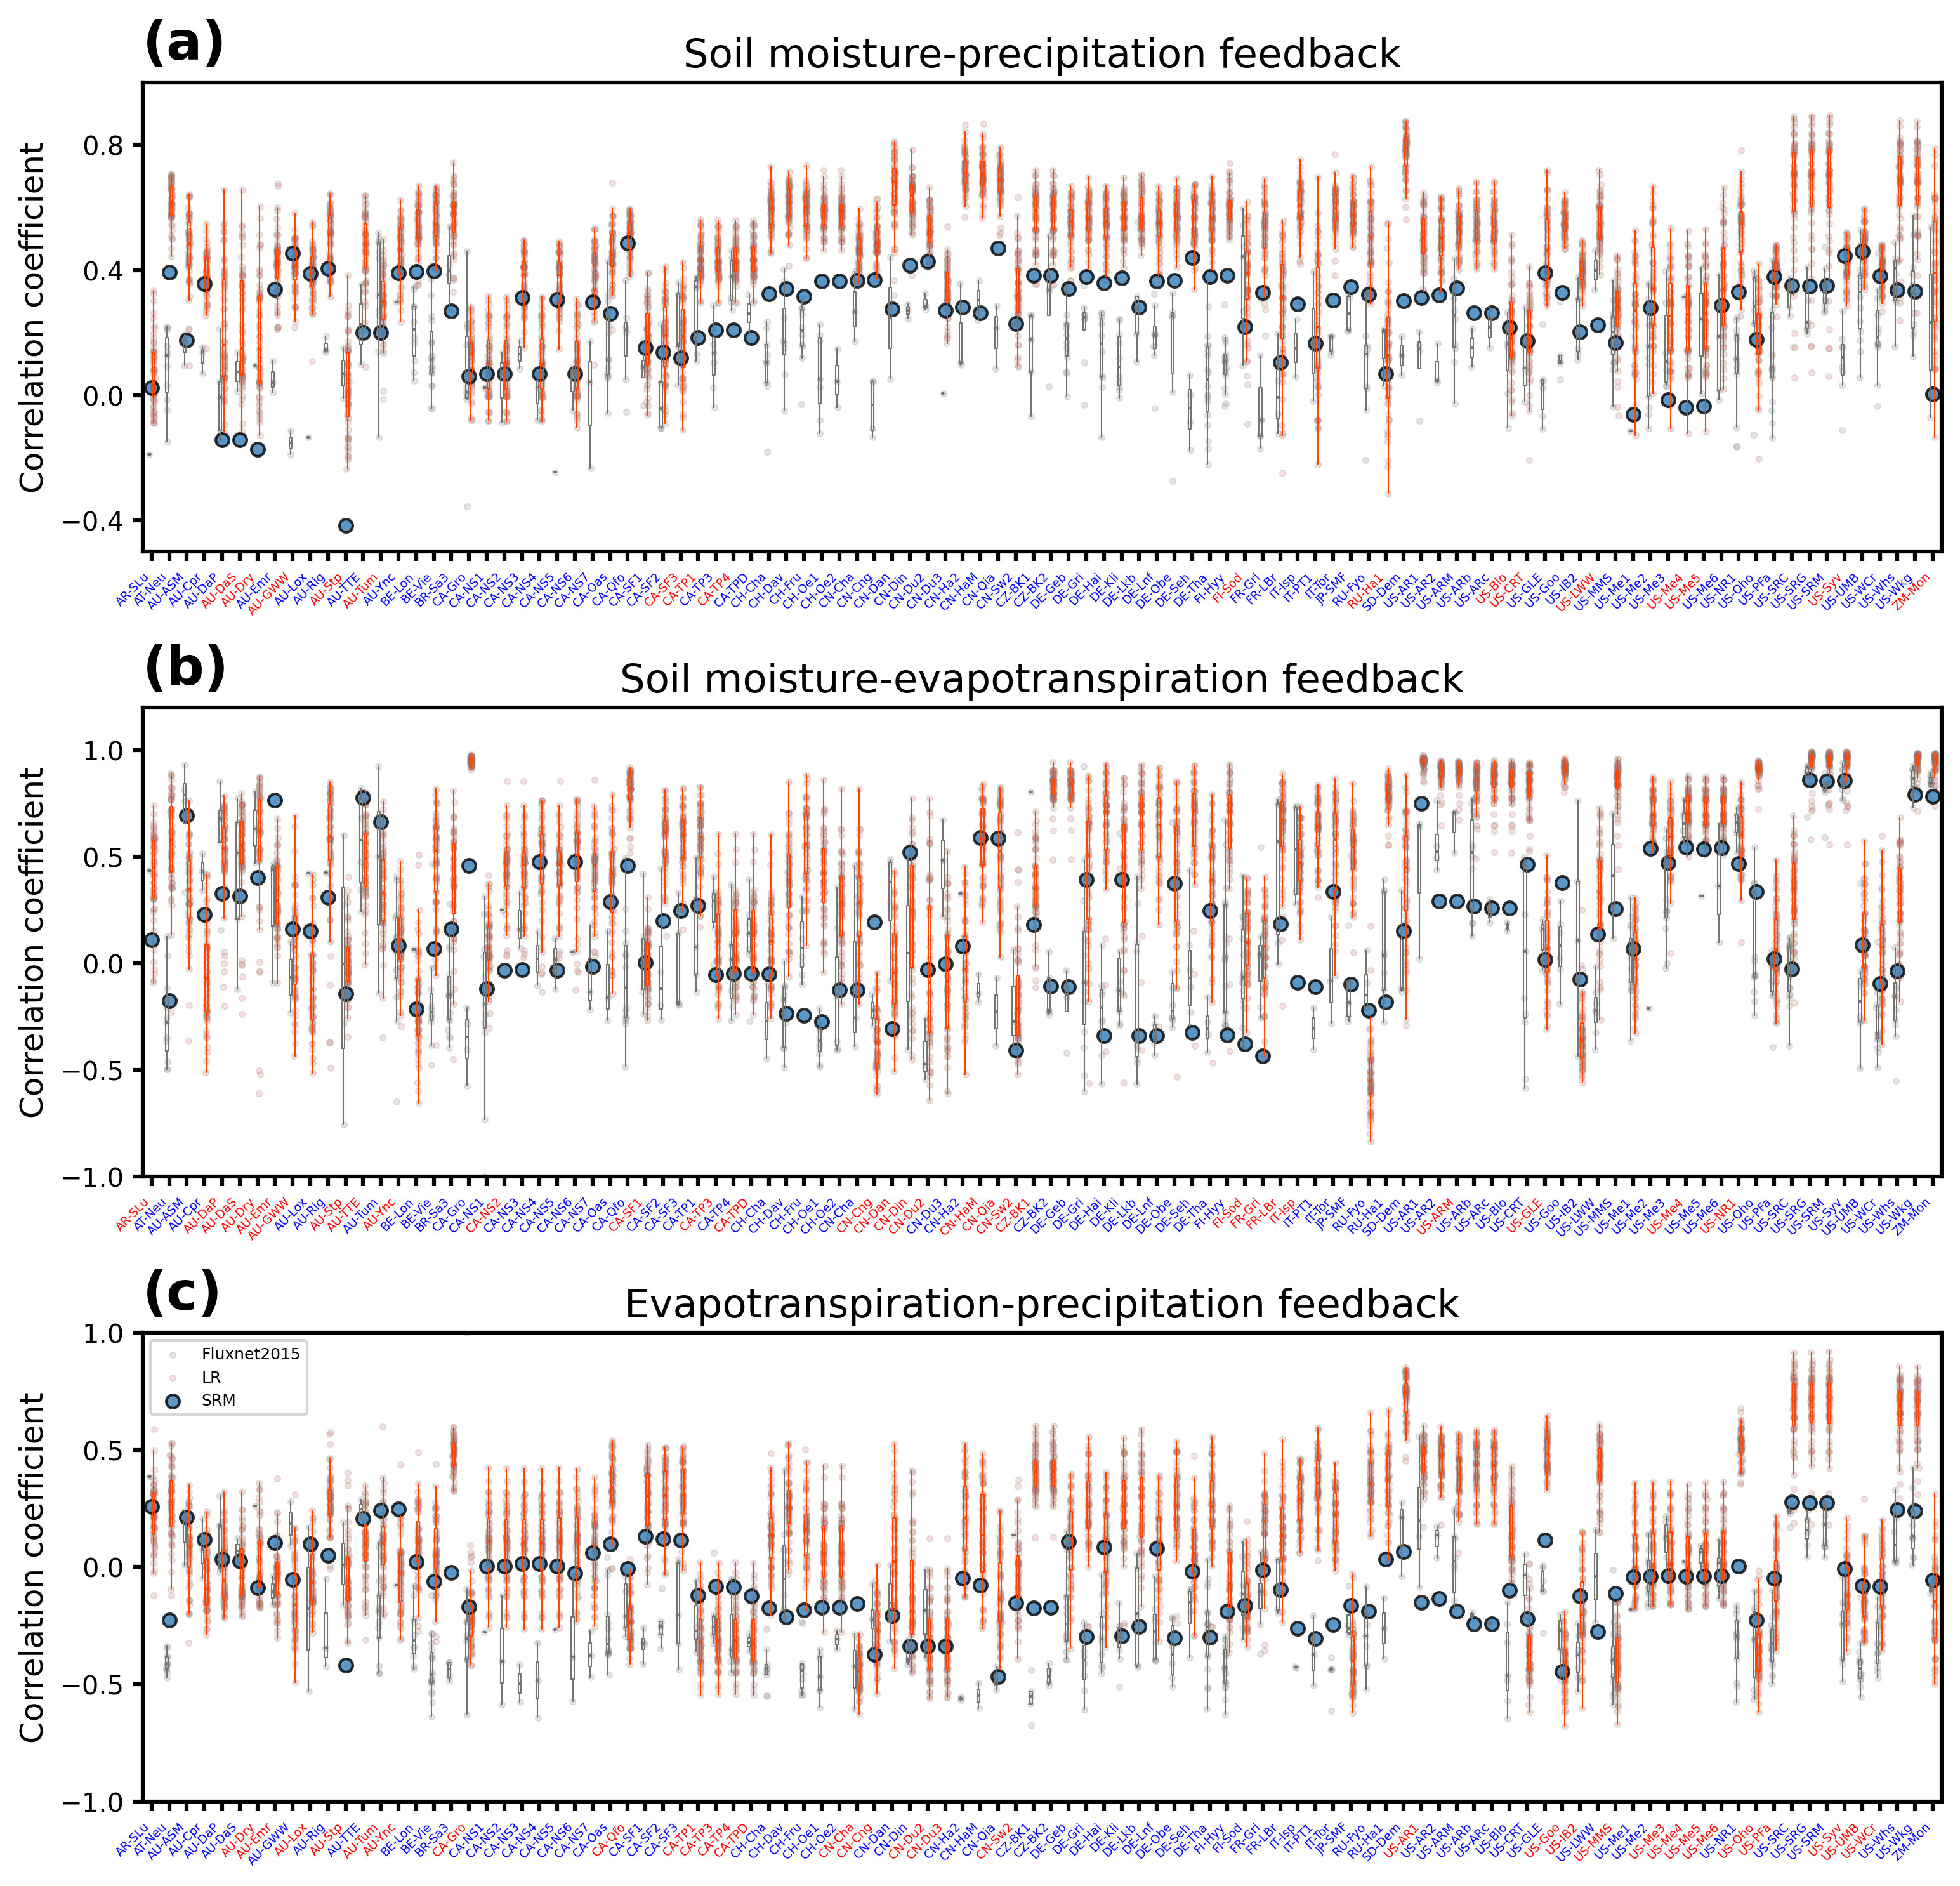

In [31]:
txt_x, txt_y = 0.0, 1.05

rmax, cmax = 3, 2
fig, ax = plt.subplots(nrows=rmax,ncols=cmax, figsize=(20,10),)

rr, cc = 0, 0
# Corr(SM, P)
plot_internal_variability(ax[rr,cc], flux_sm_pr, icon_sm_pr[:,0], cmip_sm_pr, 
                          site_list_sm_pr, sort_idx_sm_pr)
ax[rr,cc].set_xlim(0.5, len(site_list_sm_pr)+0.5)
ax[rr,cc].set_ylim(-0.5, 1.0)
ax[rr,cc].set_yticks([-0.4, 0.0, 0.4, 0.8])
ax[rr,cc].set_ylabel('Correlation coefficient', fontsize=12)
ax[rr,cc].set_title('Soil moisture-precipitation feedback', fontsize=15)
ax[rr,cc].text(txt_x, txt_y, '(a)', transform=ax[rr,cc].transAxes, size=20, weight='bold')

rr, cc = 1, 0
# Corr(SM, ET)
plot_internal_variability(ax[rr,cc], flux_sm_lh, icon_sm_lh[:,0], cmip_sm_lh,
                          site_list_sm_pr, sort_idx_sm_pr)
ax[rr,cc].set_xlim(0.5, len(site_list_sm_pr)+0.5)
ax[rr,cc].set_ylim(-1.0, 1.2)
ax[rr,cc].set_ylabel('Correlation coefficient', fontsize=12)
ax[rr,cc].set_title('Soil moisture-evapotranspiration feedback', fontsize=15)
ax[rr,cc].text(txt_x, txt_y, '(b)', transform=ax[rr,cc].transAxes, size=20, weight='bold')

rr, cc = 2, 0
# Corr(ET, P)
plot_internal_variability(ax[rr,cc],flux_lh_pr, icon_lh_pr[:,0],cmip_lh_pr,
                          site_list_sm_pr, sort_idx_sm_pr)
ax[rr,cc].set_xlim(0.5, len(site_list_sm_pr)+0.5)
ax[rr,cc].set_ylim(-1.0, 1.0)
ax[rr,cc].set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
ax[rr,cc].set_ylabel('Correlation coefficient', fontsize=12)
ax[rr,cc].set_title('Evapotranspiration-precipitation feedback', fontsize=15)
ax[rr,cc].text(txt_x, txt_y, '(c)', transform=ax[rr,cc].transAxes, size=20, weight='bold')
leg=ax[rr,cc].legend(prop={'size': 6})
# leg.get_frame().set_linewidth(0.0)

cc = 0
for rr in np.arange(rmax):
    ax[rr,cc].xaxis.set_tick_params(width=1.5, labelsize=4.5)
    ax[rr,cc].yaxis.set_tick_params(width=1.5, labelsize=10)

cc = 1
for rr in np.arange(rmax):
    ax[rr,cc].set_visible(False)

plt.tight_layout()